In [1]:
import os 
for dirname, _, filenames in os.walk('./Speach_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Speach_Data/OAF_Fear/OAF_calm_fear.wav
./Speach_Data/OAF_Fear/OAF_bar_fear.wav
./Speach_Data/OAF_Fear/OAF_dodge_fear.wav
./Speach_Data/OAF_Fear/OAF_third_fear.wav
./Speach_Data/OAF_Fear/OAF_tell_fear.wav
./Speach_Data/OAF_Fear/OAF_mill_fear.wav
./Speach_Data/OAF_Fear/OAF_wash_fear.wav
./Speach_Data/OAF_Fear/OAF_lose_fear.wav
./Speach_Data/OAF_Fear/OAF_soap_fear.wav
./Speach_Data/OAF_Fear/OAF_which_fear.wav
./Speach_Data/OAF_Fear/OAF_rot_fear.wav
./Speach_Data/OAF_Fear/OAF_yes_fear.wav
./Speach_Data/OAF_Fear/OAF_bone_fear.wav
./Speach_Data/OAF_Fear/OAF_jar_fear.wav
./Speach_Data/OAF_Fear/OAF_hush_fear.wav
./Speach_Data/OAF_Fear/OAF_lot_fear.wav
./Speach_Data/OAF_Fear/OAF_lore_fear.wav
./Speach_Data/OAF_Fear/OAF_fit_fear.wav
./Speach_Data/OAF_Fear/OAF_said_fear.wav
./Speach_Data/OAF_Fear/OAF_south_fear.wav
./Speach_Data/OAF_Fear/OAF_tire_fear.wav
./Speach_Data/OAF_Fear/OAF_chain_fear.wav
./Speach_Data/OAF_Fear/OAF_book_fear.wav
./Speach_Data/OAF_Fear/OAF_far_fear.wav
./Speach_Data/OAF_

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('./Speach_Data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')
       

Dataset is Loaded


In [4]:
len(paths)

2798

In [5]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,./Speach_Data/OAF_Fear/OAF_calm_fear.wav,fear
1,./Speach_Data/OAF_Fear/OAF_bar_fear.wav,fear
2,./Speach_Data/OAF_Fear/OAF_dodge_fear.wav,fear
3,./Speach_Data/OAF_Fear/OAF_third_fear.wav,fear
4,./Speach_Data/OAF_Fear/OAF_tell_fear.wav,fear


In [6]:
df['label'].value_counts()

label
fear       400
disgust    400
ps         400
sad        400
neutral    400
happy      400
angry      398
Name: count, dtype: int64

In [7]:
selected_labels = ["fear", "happy", "neutral", "sad","ps","disgust","angry"]
df = df[df['label'].isin(selected_labels)]
df['label'].value_counts()

label
fear       400
disgust    400
ps         400
sad        400
neutral    400
happy      400
angry      398
Name: count, dtype: int64

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

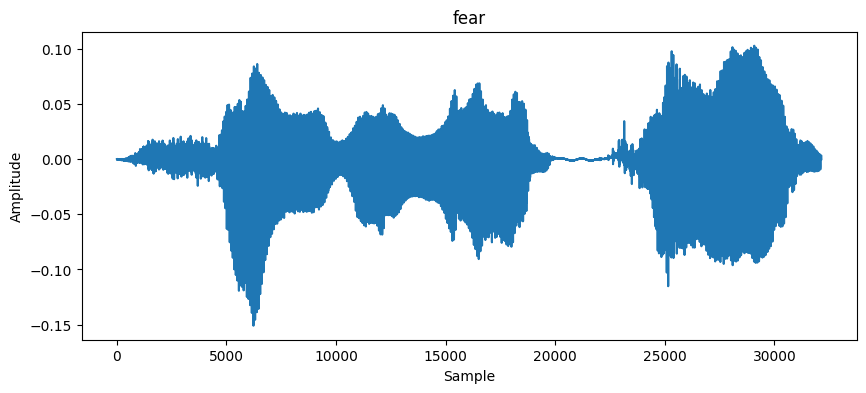

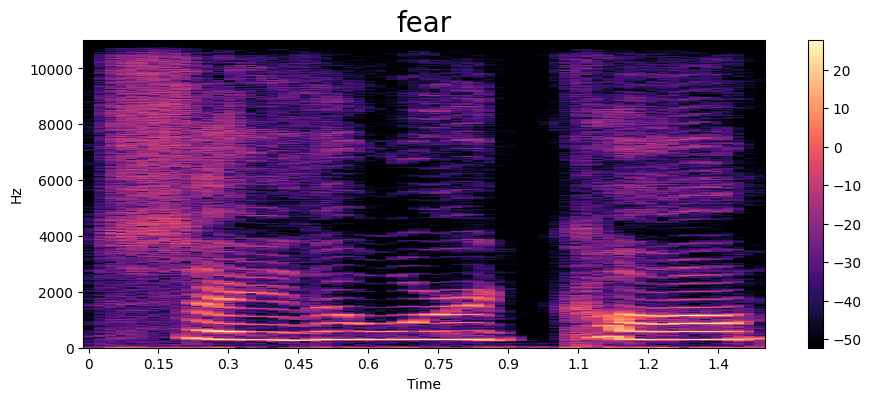

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)


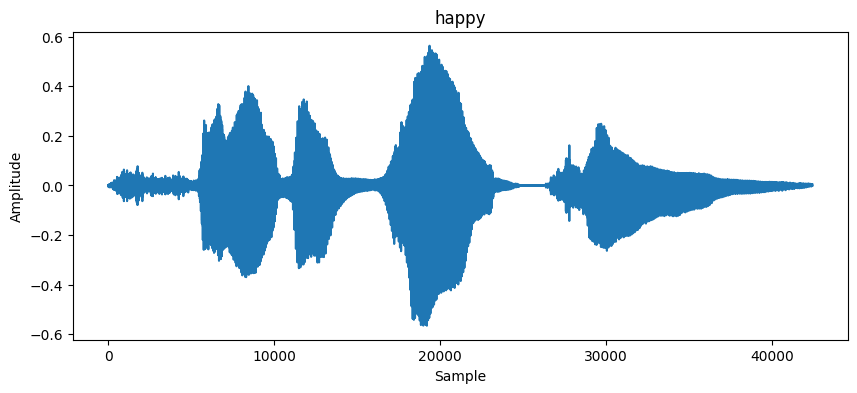

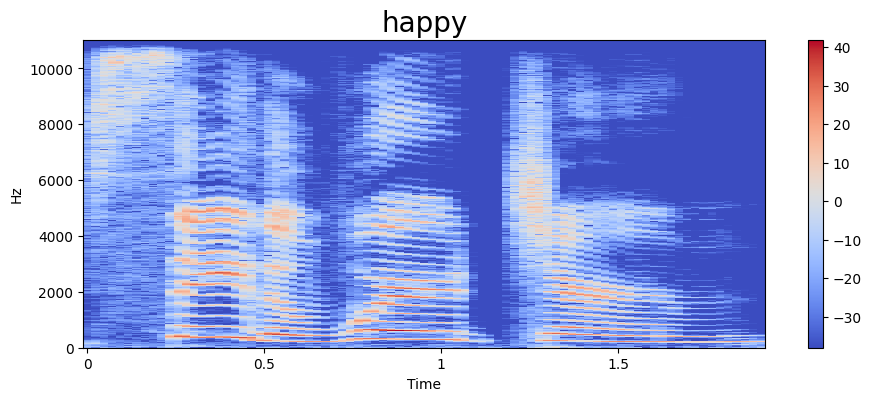

In [25]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)


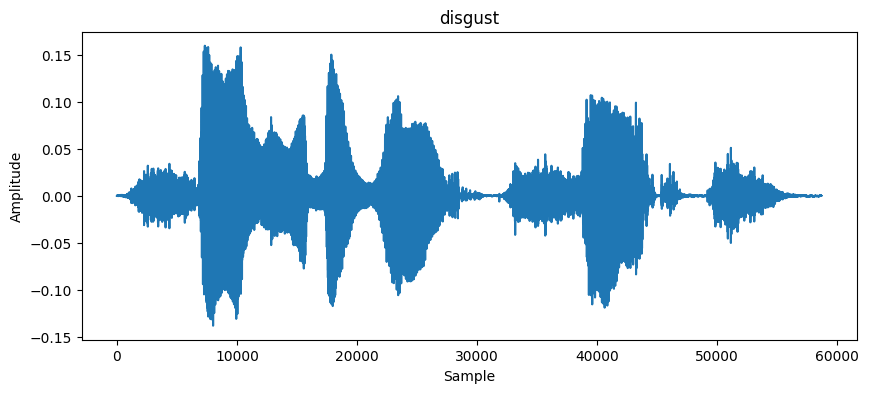

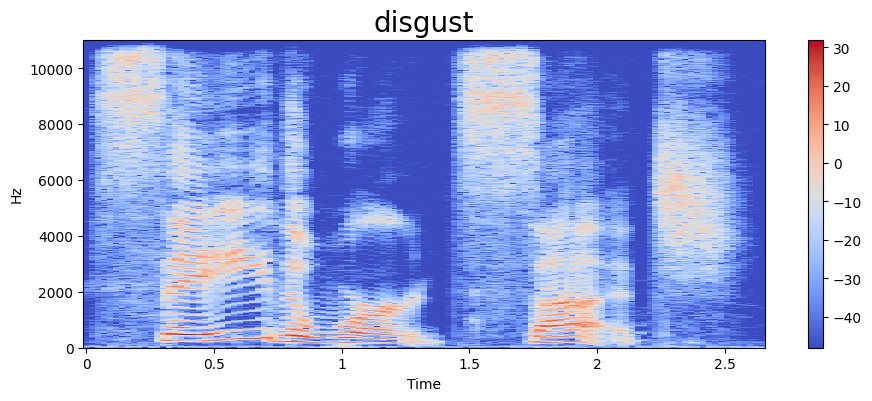

In [26]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)


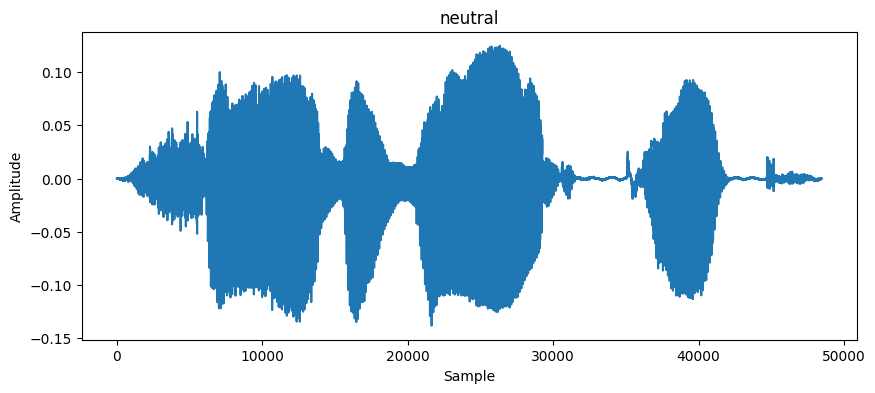

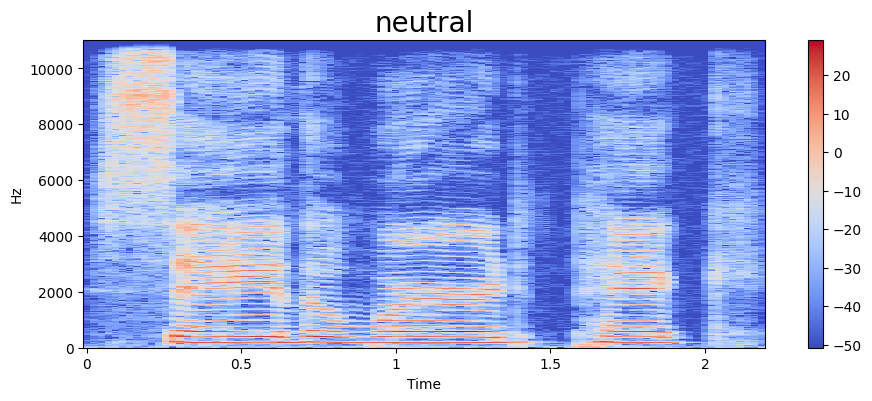

In [27]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

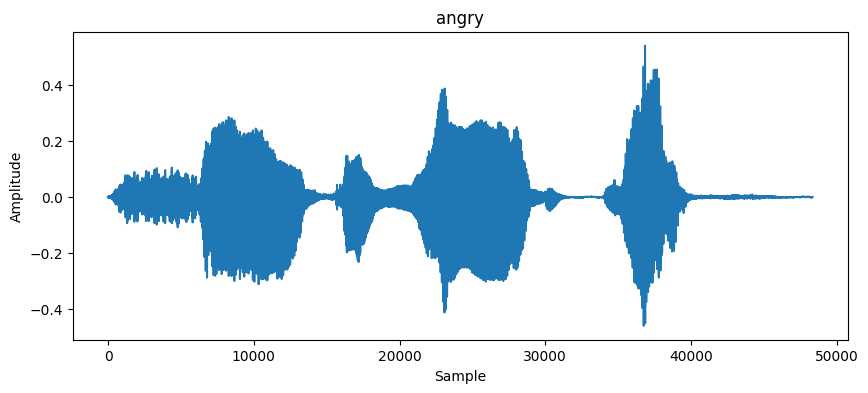

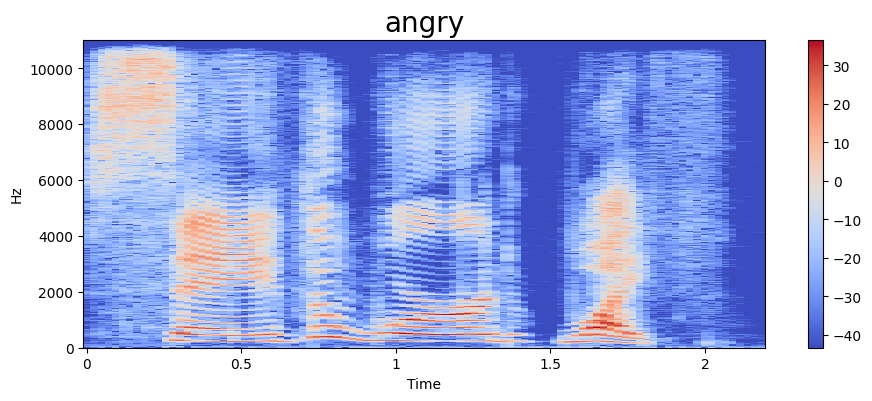

In [28]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)


In [10]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

In [11]:
extract_mfcc(df['speech'][0])

array([-4.5284827e+02,  9.9645905e+01,  1.0672774e+01, -2.4341555e+01,
       -1.1027677e+01,  2.3706234e+00, -1.3459578e+00,  5.2658396e+00,
       -2.1188576e+01, -7.1173682e+00, -1.7463070e+01, -3.9875612e+00,
       -4.0686460e+00, -2.1230159e+00, -1.0367241e+01,  3.3882592e+00,
       -4.2156734e+00,  3.7908735e+00,  4.7069831e+00, -7.6663885e+00,
        4.1033516e+00,  1.7540194e+01,  1.8446819e+01,  3.7016048e+01,
        3.1373503e+01,  2.3319706e+01, -6.3355871e-02, -9.1352320e-01,
       -5.8699560e+00,  8.4108925e+00,  6.5402656e+00, -1.0931036e+00,
       -7.0060978e+00, -8.7527027e+00,  7.2586904e+00,  6.5227871e+00,
       -2.3411455e+00, -3.0806522e+00, -7.9350486e+00,  5.9896469e+00],
      dtype=float32)

In [12]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [13]:
x_mfcc

0       [-452.84827, 99.645905, 10.672774, -24.341555,...
1       [-456.2984, 95.33351, 17.71685, -33.765804, -1...
2       [-458.90762, 61.858913, 6.6702766, -8.0293, -4...
3       [-431.2679, 71.080086, 14.987984, -26.789324, ...
4       [-455.26096, 80.50635, 12.894463, -13.73343, -...
                              ...                        
2793    [-462.3782, 100.464325, 19.199524, -16.476192,...
2794    [-470.9525, 112.84687, 42.37802, -12.181915, -...
2795    [-467.66254, 96.84909, 23.534851, 8.896149, 11...
2796    [-478.14294, 85.6553, 20.25536, -12.351978, 7....
2797    [-464.50543, 97.531075, 21.215355, -13.117853,...
Name: speech, Length: 2798, dtype: object

In [14]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2798, 40)

In [15]:
X = np.expand_dims(X, -1)
X.shape

(2798, 40, 1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [17]:
y = y.toarray()

In [18]:
y.shape

(2798, 7)

### **Create the LSTM Model**

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2024-04-19 21:33:25.884137: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 21:33:25.913307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 21:33:25.913333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 21:33:25.914015: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 21:33:25.918999: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [20]:
type(X)

numpy.ndarray

In [21]:
type(y)

numpy.ndarray

In [22]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=256)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/100


2024-04-19 21:33:32.556832: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-19 21:33:33.139695: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f71d8165490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-19 21:33:33.139720: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-04-19 21:33:33.144446: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713542613.209704   80990 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 4s 47ms/step - loss: 1.6242 - accuracy: 0.3686 - val_loss: 2.5986 - val_accuracy: 0.2196
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.9801 - accuracy: 0.6229 - val_loss: 3.3196 - val_accuracy: 0.3304
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 0.6125 - accuracy: 0.7752 - val_loss: 2.9329 - val_accuracy: 0.3750
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3255 - accuracy: 0.8914 - val_loss: 3.5266 - val_accuracy: 0.3732
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 0.2480 - accuracy: 0.9191 - val_loss: 3.8066 - val_accuracy: 0.3839
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 0.2222 - accuracy: 0.9240 - val_loss: 3.2614 - val_accuracy: 0.3946
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1546 - accuracy: 0.9500 - val_loss: 4.2755 - val_accuracy: 0.3107
Epoch 8/100
9/9 [===============

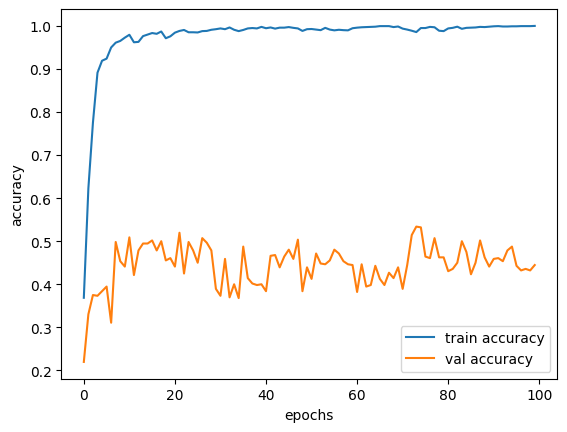

In [23]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


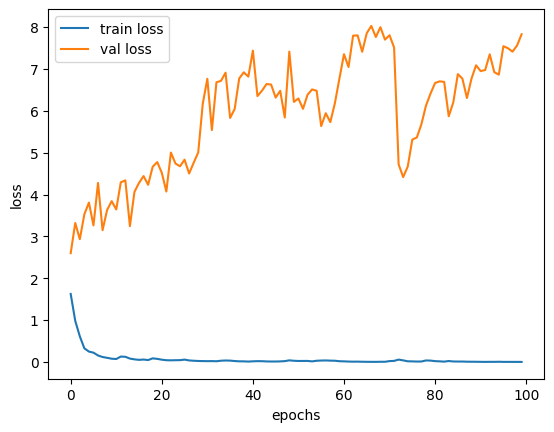

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()